# LeetCode: [Product of Array Except Self](https://leetcode.com/problems/product-of-array-except-self)

__Difficulty: Medium__

__Data Structure(s): Array__

__Techniques: iterating forwards and backwards in two different for loops__

<hr>

### Description:

Given an integer array nums, return *an array answer such that `answer[i]` is equal to the product of all the elements of nums except `nums[i]`*.

The product of any prefix or suffix of `nums` is guaranteed to fit in a 32-bit integer.

You must write an algorithm that runs in `O(n)` time and without using the division operation.

 

Example 1:

> Input: nums = [1,2,3,4]<br>Output: [24,12,8,6]

Example 2:

> Input: nums = [-1,1,0,-3,3]<br>Output: [0,0,9,0,0]


 

Constraints:
* `2 <= nums.length <= 105`
* `-30 <= nums[i] <= 30`
* The product of any prefix or suffix of nums is guaranteed to fit in a 32-bit integer.

<hr>

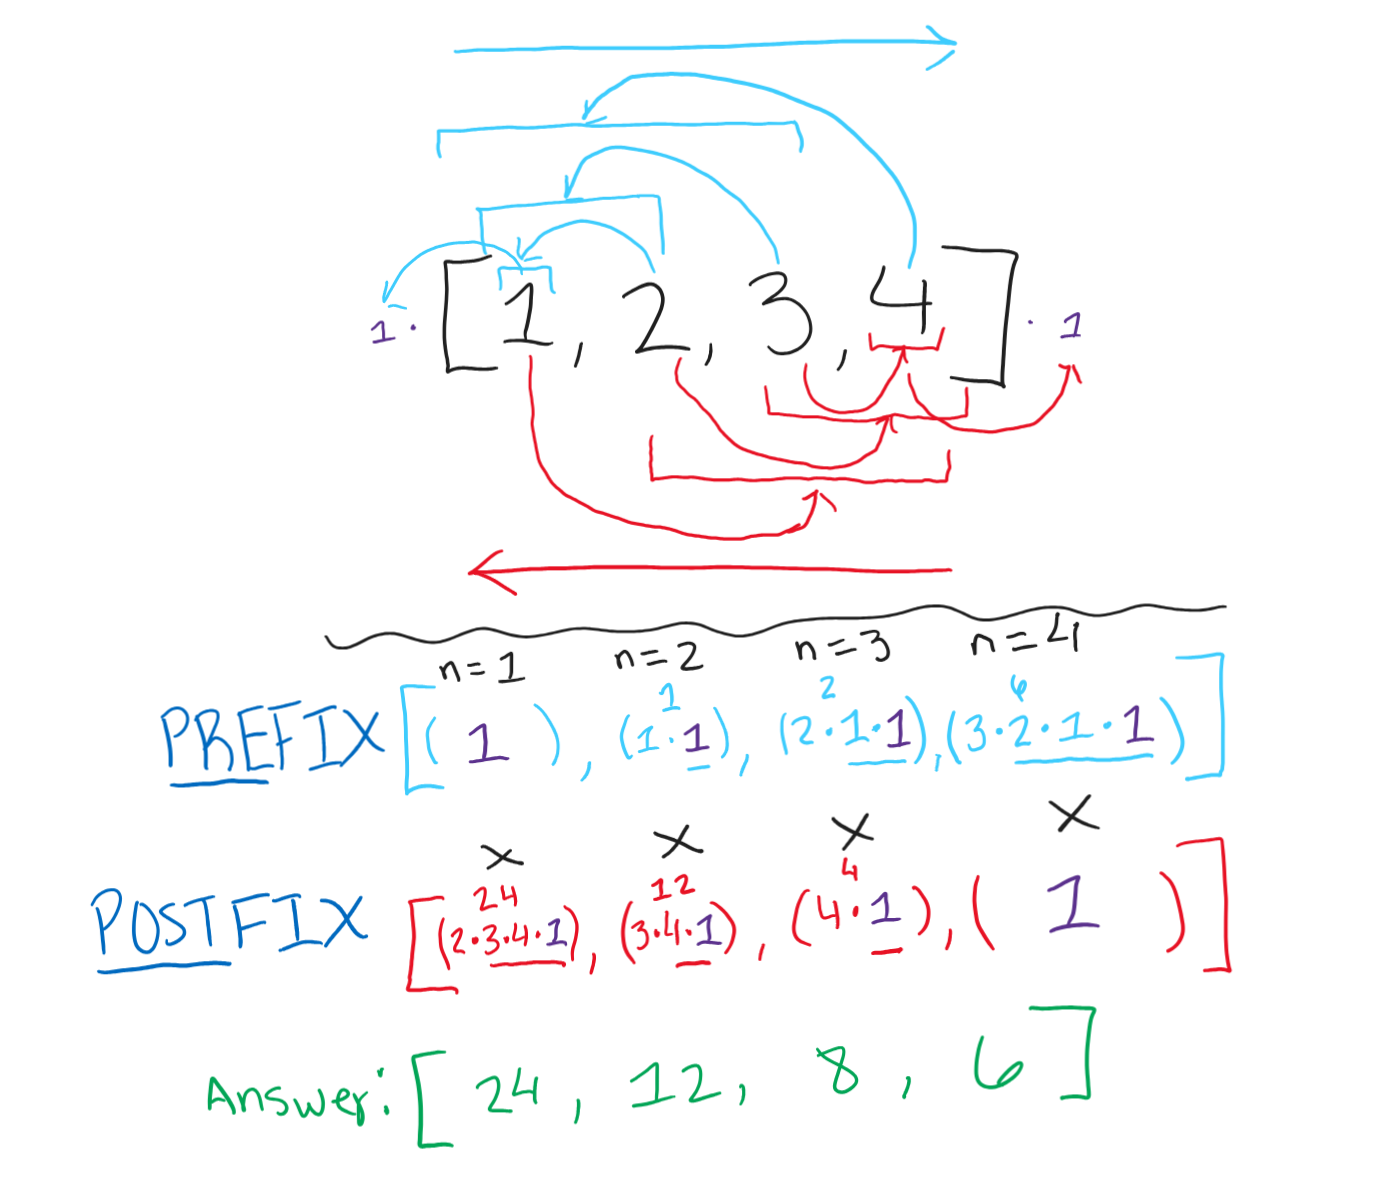

*A bit better*

In [7]:
nums = [1, 2, 3, 4]
result = [1] * len(nums)
prefixProduct = 1
postfixProduct = 1

if (len(result) == 1):
    print(result[nums[0]])

# forward iteration (prefix, nums before current index)
for i in range(0, len(nums)):
    result[i] = prefixProduct
    prefixProduct *= nums[i]

for i in range(len(nums)-1, -1, -1):
    result[i] *= postfixProduct
    postfixProduct *= nums[i]

print(result)

[24, 12, 8, 6]


*Better solution*

Time Complexity: $O(N + N) = O(N)$

Space Complexity: $O(1)$

In [3]:
nums = [1, 2, 3, 4]
result = [1] * len(nums)
prefixProduct = 1
postfixProduct = 1

if (len(result) == 1):
    print(result[nums[0]])

# forward iteration (prefix, nums before current index)
for i in range(0, len(nums)):
    if (i == 0):
        result[i] = 1
    elif (i == len(nums)-1):
        continue
    prefixProduct *= nums[i]
    result[i + 1] = prefixProduct

for i in range(len(nums)-1, -1, -1):
    if (i == 0):
        result[i] *= 1
        continue
    postfixProduct *= nums[i]
    result[i - 1] *= postfixProduct

print(result)

[24, 12, 8, 6]


*Initial solution, correct but very slow*

Time Complexity: $O(N + N + N) = O(N)$

Space Complexity: $O(N)$

In [17]:
nums = [1, 2, 3, 4]
# nums = [4,3,2,1,2]
prefixNums = []
postfixNums = []
result = []

if (len(result) == 1):
    print(result[nums[0]])

# forward iteration (prefix, nums before current index)
for i in range(0, len(nums)):
    if (i == 0):
        prefixNums.append(nums[i])
    elif (i-1 >= 0):
        currentRunningProduct = 1
        currentPrefixIndex = 0

        # continue multiplying nums to the LEFT of current index num
        while (currentPrefixIndex <= i):
            currentRunningProduct *= nums[currentPrefixIndex]
            currentPrefixIndex += 1

        prefixNums.append(currentRunningProduct)

# reverse iteration (postfix, nums after current index)
for i in range(len(nums)-1, -1, -1):
    if (i == len(nums)-1):
        postfixNums.insert(0, nums[i])
    elif (i+1 <= len(nums)-1):
        currentRunningProduct = 1
        currentPostfixIndex = len(nums)-1

        # continue multiplying nums to the RIGHT of current index num
        while (currentPostfixIndex >= i):
            currentRunningProduct *= nums[currentPostfixIndex]
            currentPostfixIndex -= 1

        # insert at starting position to keep postfixNums list reversed
        postfixNums.insert(0, currentRunningProduct)

for i in range(0, len(prefixNums)):
    # there is no LEFT neighbor
    if (i == 0):
        result.append(postfixNums[i+1])
    
    # there is no RIGHT neighbor
    elif (i == len(prefixNums) - 1):
        result.append(prefixNums[i-1])
    
    # there should be an neighbor before and after the current index
    else:
        result.append(prefixNums[i-1] * postfixNums[i+1])

print(nums)
print(prefixNums)
print(postfixNums)
print(result)

[1, 2, 3, 4]
[1, 2, 6, 24]
[24, 24, 12, 4]
[24, 12, 8, 6]
